In [1]:
#Multiple-level majority rule (synchronous)

import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
from copy import deepcopy
import numpy as np

G = nx.karate_club_graph()
# G = nx.complete_graph(8)
levels = 5

def initialize():
    global G, nextG, levels
    G.pos = nx.spring_layout(G)
#     G.pos = nx.circular_layout(G)
    for attr in G.nodes.values():
        attr['state'] = np.random.randint(levels)
    nextG = deepcopy(G)
    
def observe():
    global G, nextG, levels
    cla()
    nx.draw_networkx(G, pos = G.pos, with_labels = False,  node_size=200, node_color='black')
    nx.draw_networkx(G, pos = G.pos, with_labels = False,  node_size=100,
                     node_color = [attr['state']/(levels-1) for attr in G.nodes.values()],
                     cmap = cm.rainbow, vmin = 0, vmax = 1)
    
def update():
    global G, nextG, levels
    for i in G.nodes():
        counts = np.zeros(levels)
        my_state = G.node[i]['state']
        counts[my_state] += 1
        
        for j in G.neighbors(i):
            nb_state = G.node[j]['state']
            counts[nb_state] += 1

        Max = counts.max()
        idx = np.where(counts == Max)[0]
        nextG.node[i]['state'] = np.random.choice(idx)
    G, nextG = nextG, G

import pycxsimulator
pycxsimulator.GUI().start(func=[initialize, observe, update])

In [1]:
#Voter model (asynchronous)

import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
from copy import deepcopy
import numpy as np

G = nx.karate_club_graph()
# G = nx.complete_graph(8)
levels = 5
mode = 'pull'

def initialize():
    global G, nextG, levels
    G.pos = nx.spring_layout(G)
#     G.pos = nx.circular_layout(G)
    for attr in G.nodes.values():
        attr['state'] = np.random.randint(levels)
    nextG = deepcopy(G)
    
def observe():
    global G, nextG, levels
    cla()
    nx.draw_networkx(G, pos = G.pos, with_labels = False,  node_size=200, node_color='black')
    nx.draw_networkx(G, pos = G.pos, with_labels = False,  node_size=100,
                     node_color = [attr['state']/(levels-1) for attr in G.nodes.values()],
                     cmap = cm.rainbow, vmin = 0, vmax = 1)
    
def update():
    global G, nextG, levels
    if(mode == 'edge'):
        E = list(G.edges)
        idx = np.random.choice(len(E))
        i, j = E[idx]
        new_mode = np.random.choice(['push','pull'])
    else:
        i = np.random.choice(G.nodes())
        j = np.random.choice(list(G.neighbors(i)))
        new_mode = mode
    
    if(new_mode == 'pull'):
        G.nodes[i]['state'] = G.nodes[j]['state']
    elif(new_mode == 'push'):
        G.nodes[j]['state'] = G.nodes[i]['state']
    else:
        raise Exception('Invalid mode')

    
import pycxsimulator
pycxsimulator.GUI().start(func=[initialize, observe, update])

Looking at state 0.  It is currently infected.  It recovers!!
Looking at state 18.  It is currently susceptible.  It encounters 8 who is infected.  And the disease spread to 18.
Looking at state 3.  It is currently infected.  It recovers!!
Looking at state 15.  It is currently infected.  It stays infected.
Looking at state 4.  It is currently susceptible.  It encounters 9 who is not infected.
Looking at state 6.  It is currently susceptible.  It encounters 2 who is infected.  And the disease spread to 6.
Looking at state 10.  It is currently infected.  It stays infected.
Looking at state 3.  It is currently susceptible.  It encounters 6 who is infected.  But the disease did not spread to 3.
Looking at state 1.  It is currently infected.  It recovers!!
Looking at state 8.  It is currently infected.  It recovers!!
Looking at state 12.  It is currently susceptible.  It encounters 6 who is infected.  But the disease did not spread to 12.
Looking at state 5.  It is currently susceptible.  I

Looking at state 12.  It is currently infected.  It stays infected.
Looking at state 5.  It is currently susceptible.  It encounters 1 who is infected.  But the disease did not spread to 5.
Looking at state 16.  It is currently susceptible.  It encounters 3 who is not infected.
Looking at state 6.  It is currently susceptible.  It encounters 15 who is infected.  And the disease spread to 6.
Looking at state 17.  It is currently susceptible.  It encounters 3 who is not infected.
Looking at state 11.  It is currently susceptible.  It encounters 9 who is not infected.
Looking at state 8.  It is currently susceptible.  It encounters 7 who is infected.  And the disease spread to 8.
Looking at state 14.  It is currently susceptible.  It encounters 8 who is infected.  And the disease spread to 14.
Looking at state 19.  It is currently susceptible.  It encounters 4 who is not infected.
Looking at state 15.  It is currently infected.  It stays infected.
Looking at state 12.  It is currently inf

Looking at state 18.  It is currently susceptible.  It encounters 8 who is infected.  And the disease spread to 18.
Looking at state 13.  It is currently susceptible.  It encounters 6 who is not infected.
Looking at state 12.  It is currently susceptible.  It encounters 11 who is not infected.
Looking at state 12.  It is currently susceptible.  It encounters 7 who is not infected.
Looking at state 2.  It is currently infected.  It recovers!!
Looking at state 10.  It is currently infected.  It recovers!!
Looking at state 13.  It is currently susceptible.  It encounters 18 who is infected.  And the disease spread to 13.
Looking at state 14.  It is currently susceptible.  It encounters 12 who is not infected.
Looking at state 16.  It is currently susceptible.  It encounters 3 who is not infected.
Max steps 200 reached with 0.250000 of nodes still infected


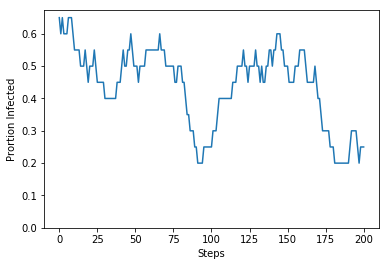

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\scook\AppData\Local\Continuum\Anaconda3\lib\tkinter\__init__.py", line 1699, in __call__
    return self.func(*args)
  File "C:\Users\scook\AppData\Local\Continuum\Anaconda3\lib\tkinter\__init__.py", line 745, in callit
    func(*args)
  File "C:\Users\scook\Dropbox\0m4320_17fl_math_models\network dynamics\pycxsimulator.py", line 228, in stepModel
    self.drawModel()
  File "C:\Users\scook\Dropbox\0m4320_17fl_math_models\network dynamics\pycxsimulator.py", line 254, in drawModel
    self.modelFigure.canvas.manager.window.update()
AttributeError: 'FigureManagerBase' object has no attribute 'window'


In [1]:
#SIS model (asynchronous)

import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
from copy import deepcopy
import numpy as np

# G = nx.karate_club_graph()
# G = nx.complete_graph(8)
G = nx.barabasi_albert_graph(20,3)
levels = 2
n = len(G.nodes)
p_i = 0.7
p_r = 0.5
max_steps = 200
proportion_infected = []


def count_infected():
    return [g['state'] for g in G.nodes.values()].count(1)

def plot_infection_rates():
    %matplotlib inline
    plt.plot(proportion_infected)
    plt.xlabel('Steps')
    plt.ylabel('Prortion Infected')
    plt.ylim([0,None])
    plt.show()

def initialize():
    global G, nextG, levels
    G.pos = nx.spring_layout(G)
#     G.pos = nx.circular_layout(G)
    for attr in G.nodes.values():
        attr['state'] = np.random.choice(levels, p=[1-p_i, p_i])
    proportion_infected.append(1.0 * count_infected() / n)
        
def observe():
    global G, nextG, levels
    cla()
    nx.draw_networkx(G, pos = G.pos, with_labels = True, font_weight='bold',  node_size=200, node_color='white')
    nx.draw_networkx(G, pos = G.pos, with_labels = False, node_size=100,
                     node_color = [attr['state']/(levels-1) for attr in G.nodes.values()],
                     cmap = cm.rainbow, vmin = 0, vmax = 1, alpha = 0.4)
    
def update():
    global G, nextG, levels, pop_up
    steps = len(proportion_infected) - 1
    if(count_infected() == 0):
        print('All nodes recovered.  Disease eradicated after %d steps!!' % steps)
        pop_up.runEvent()
        plot_infection_rates()
    elif(steps >= max_steps):
        print('Max steps %d reached with %f of nodes still infected' % (steps, proportion_infected[-1]))
        pop_up.runEvent()
        plot_infection_rates()
    else:
        i = np.random.choice(G.nodes())
        message = "Looking at state %d."%i
        if(G.node[i]['state'] == 0):
            message = message + "  It is currently susceptible."
            j = np.random.choice(list(G.neighbors(i)))
            message = message + "  It encounters %d"%j
            if(G.node[j]['state'] == 0):
                message = message + " who is not infected."
            else:
                message = message + " who is infected."
                if(np.random.rand() < p_i):
                    G.node[i]['state'] = 1
                    message = message + "  And the disease spread to %d."%i
                else:
                    message = message + "  But the disease did not spread to %d."%i
        else:        
            message = message + "  It is currently infected."
            if(np.random.rand() < p_r):
                G.node[i]['state'] = 0
                message = message + "  It recovers!!"
            else:
                message = message + "  It stays infected."
#         print(message)
        proportion_infected.append(1.0 * count_infected() / n)
import pycxsimulator
pop_up = pycxsimulator.GUI()
pop_up.start(func=[initialize, observe, update])

Looking at state 10.  It is currently infected.  It stays infected.
Looking at state 9.  It is currently infected.  It stays infected.
Looking at state 32.  It is currently infected.  It stays infected.
Looking at state 0.  It is currently infected.  It stays infected.
Looking at state 6.  It is currently susceptible.  It encounters 4 who is infected.  And the disease spread to 6.
Looking at state 26.  It is currently susceptible.  It encounters 33 who is not infected.
Looking at state 10.  It is currently infected.  It stays infected.
Looking at state 26.  It is currently susceptible.  It encounters 29 who is not infected.
Looking at state 30.  It is currently infected.  It recovers!!
Looking at state 7.  It is currently infected.  It stays infected.
Looking at state 16.  It is currently susceptible.  It encounters 5 who is infected.  And the disease spread to 16.
Looking at state 23.  It is currently susceptible.  It encounters 25 who is not infected.
Looking at state 8.  It is curre

Looking at state 26.  It is currently susceptible.  It encounters 29 who is not infected.
Looking at state 3.  It is currently susceptible.  It encounters 0 who is infected.  And the disease spread to 3.
Looking at state 33.  It is currently susceptible.  It encounters 9 who is not infected.
Looking at state 19.  It is currently susceptible.  It encounters 0 who is infected.  And the disease spread to 19.
Looking at state 29.  It is currently susceptible.  It encounters 33 who is not infected.
Looking at state 21.  It is currently infected.  It stays infected.
Looking at state 22.  It is currently susceptible.  It encounters 32 who is infected.  And the disease spread to 22.
Looking at state 15.  It is currently susceptible.  It encounters 32 who is infected.  But the disease did not spread to 15.
Looking at state 7.  It is currently infected.  It stays infected.
Looking at state 14.  It is currently susceptible.  It encounters 33 who is not infected.
Looking at state 16.  It is curren

Looking at state 29.  It is currently susceptible.  It encounters 23 who is not infected.
Looking at state 24.  It is currently susceptible.  It encounters 25 who is not infected.
Looking at state 18.  It is currently susceptible.  It encounters 33 who is not infected.
Looking at state 12.  It is currently infected.  It recovers!!
Looking at state 15.  It is currently infected.  It recovers!!
Looking at state 18.  It is currently susceptible.  It encounters 33 who is not infected.
Looking at state 9.  It is currently susceptible.  It encounters 2 who is infected.  And the disease spread to 9.
Max steps 200 reached with 0.235294 of nodes still infected


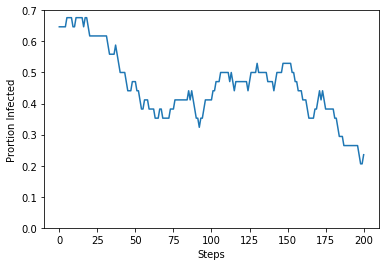

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\scook\AppData\Local\Continuum\Anaconda3\lib\tkinter\__init__.py", line 1699, in __call__
    return self.func(*args)
  File "C:\Users\scook\AppData\Local\Continuum\Anaconda3\lib\tkinter\__init__.py", line 745, in callit
    func(*args)
  File "C:\Users\scook\Dropbox\0m4320_17fl_math_models\network dynamics\pycxsimulator.py", line 228, in stepModel
    self.drawModel()
  File "C:\Users\scook\Dropbox\0m4320_17fl_math_models\network dynamics\pycxsimulator.py", line 254, in drawModel
    self.modelFigure.canvas.manager.window.update()
AttributeError: 'FigureManagerBase' object has no attribute 'window'


In [1]:
#SIS model (asynchronous) with variable infection probabilities

import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
from copy import deepcopy
import numpy as np

G = nx.karate_club_graph()
# G = nx.complete_graph(8)
levels = 2
n = len(G.nodes)
p_i = np.random.rand(n)
# p_i = 0.7
p_r = 0.5
max_steps = 200
proportion_infected = []


def count_infected():
    return [g['state'] for g in G.nodes.values()].count(1)

def plot_infection_rates():
    %matplotlib inline
    plt.plot(proportion_infected)
    plt.xlabel('Steps')
    plt.ylabel('Prortion Infected')
    plt.ylim([0,None])
    plt.show()

def initialize():
    global G, nextG, levels
    G.pos = nx.spring_layout(G)
#     G.pos = nx.circular_layout(G)
    for i in range(n):
        G.nodes[i]['state'] = (np.random.rand() <= p_i[i])
    proportion_infected.append(1.0 * count_infected() / n)
        
def observe():
    global G, nextG, levels
    cla()
    nx.draw_networkx(G, pos = G.pos, with_labels = True, font_weight='bold',  node_size=200, node_color='white')
    nx.draw_networkx(G, pos = G.pos, with_labels = False, node_size=100,
                     node_color = [attr['state']/(levels-1) for attr in G.nodes.values()],
                     cmap = cm.rainbow, vmin = 0, vmax = 1, alpha = 0.4)
    
def update():
    global G, nextG, levels, pop_up
    steps = len(proportion_infected) - 1
    if(count_infected() == 0):
        print('All nodes recovered.  Disease eradicated after %d steps!!' % steps)
        pop_up.runEvent()
        plot_infection_rates()
    elif(steps >= max_steps):
        print('Max steps %d reached with %f of nodes still infected' % (steps, proportion_infected[-1]))
        pop_up.runEvent()
        plot_infection_rates()
    else:
        i = np.random.choice(G.nodes())
        message = "Looking at state %d."%i
        if(G.node[i]['state'] == 0):
            message = message + "  It is currently susceptible."
            j = np.random.choice(list(G.neighbors(i)))
            message = message + "  It encounters %d"%j
            if(G.node[j]['state'] == 0):
                message = message + " who is not infected."
            else:
                message = message + " who is infected."
                if(np.random.rand() < p_i[i]):
                    G.node[i]['state'] = 1
                    message = message + "  And the disease spread to %d."%i
                else:
                    message = message + "  But the disease did not spread to %d."%i
        else:        
            message = message + "  It is currently infected."
            if(np.random.rand() < p_r):
                G.node[i]['state'] = 0
                message = message + "  It recovers!!"
            else:
                message = message + "  It stays infected."
        print(message)
        proportion_infected.append(1.0 * count_infected() / n)
import pycxsimulator
pop_up = pycxsimulator.GUI()
pop_up.start(func=[initialize, observe, update])